In [1]:
# Core
import os
import json
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import tensorflow as tf
print(tf.__version__)


2.13.0


In [3]:
print("TF ready")


TF ready


In [4]:
BASE_DIR = "data/local_food_dataset"

IMG_SIZE = (128, 128)
BATCH_SIZE = 32

print("Train exists:", os.path.exists(f"{BASE_DIR}/train"))
print("Valid exists:", os.path.exists(f"{BASE_DIR}/valid"))
print("Test exists:", os.path.exists(f"{BASE_DIR}/test"))


Train exists: True
Valid exists: True
Test exists: True


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_DIR}/train",
    labels="inferred",
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

validation_set = tf.keras.utils.image_dataset_from_directory(
    f"{BASE_DIR}/valid",
    labels="inferred",
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 1184 files belonging to 21 classes.
Found 274 files belonging to 21 classes.


In [6]:
class_names = training_set.class_names

print("Number of classes:", len(class_names))
print("Classes:", class_names)

assert training_set.class_names == validation_set.class_names, \
    "❌ Train and validation classes do not match!"


Number of classes: 21
Classes: ['apple', 'bambaranuts', 'banana', 'beefstew', 'cabbage', 'chicken', 'corn', 'eggs', 'grapes', 'kapenta', 'mango', 'onion', 'orange', 'peas', 'potato', 'rape', 'rice', 'sadza(maize_meal)', 'soy beans', 'sweetpotato', 'tomato']


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

training_set = training_set.map(lambda x, y: (normalization_layer(x), y))
validation_set = validation_set.map(lambda x, y: (normalization_layer(x), y))


##BUILD CNN MODEL

In [8]:
NUM_CLASSES = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [9]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
history = model.fit(
    training_set,
    validation_data=validation_set,
    epochs=20
)


Epoch 1/20
37/37 [==============================] - 100s 2s/step - loss: 2.7220 - accuracy: 0.1470 - val_loss: 2.8334 - val_accuracy: 0.1788
Epoch 2/20
37/37 [==============================] - 45s 1s/step - loss: 2.0126 - accuracy: 0.3792 - val_loss: 2.3387 - val_accuracy: 0.2774
Epoch 3/20
37/37 [==============================] - 44s 1s/step - loss: 1.5800 - accuracy: 0.5051 - val_loss: 1.6628 - val_accuracy: 0.4854
Epoch 4/20
37/37 [==============================] - 46s 1s/step - loss: 1.3697 - accuracy: 0.5600 - val_loss: 1.4677 - val_accuracy: 0.5474
Epoch 5/20
37/37 [==============================] - 46s 1s/step - loss: 1.0905 - accuracy: 0.6554 - val_loss: 0.9934 - val_accuracy: 0.6679
Epoch 6/20
37/37 [==============================] - 44s 1s/step - loss: 0.8674 - accuracy: 0.7247 - val_loss: 0.8477 - val_accuracy: 0.6752
Epoch 7/20
37/37 [==============================] - 44s 1s/step - loss: 0.6768 - accuracy: 0.7711 - val_loss: 0.5681 - val_accuracy: 0.8540
Epoch 8/20
37/37 [=

In [11]:
model.save("zimfoodkidney.h5")

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

with open("training_history.json", "w") as f:
    json.dump(history.history, f)

print("✅ Model, class names, and training history saved.")


c:\Users\HP\Documents\MpiloPanasheProject\mpilo_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


✅ Model, class names, and training history saved.


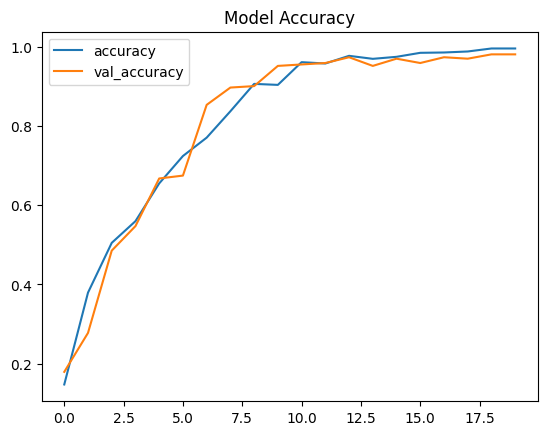

In [12]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title("Model Accuracy")
plt.show()
